In [165]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.stats.multitest import fdrcorrection, multipletests
import statsmodels

### 1. Load and visualize the data

a) 

In [166]:
core_path = './data'
transcriptomics = pd.read_csv( os.path.join(core_path, 'transcriptomics.dataset.txt'),sep= "\t")

In [167]:
transcriptomics.rename(columns = {"Unnamed: 0":'Gene_ID'})

,Gene_ID,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,18,12,9,20,9,13,20,8,4,...,9,9,30,9,23,16,3,14,11,16
1,ENSG00000000005,0,0,0,2,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,ENSG00000000419,10,9,9,8,10,10,6,35,13,...,3,9,9,15,8,9,9,4,16,5
3,ENSG00000000457,0,11,0,6,2,12,11,1,2,...,9,8,8,5,6,0,12,13,4,11
4,ENSG00000000460,0,0,14,4,5,0,0,6,4,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63672,ENSG00000273489,0,0,0,2,0,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0
63673,ENSG00000273490,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63674,ENSG00000273491,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63675,ENSG00000273492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


What is the size of the matrix ?

63677 genes and 80 samples : matrix size 63677*80

b) What type of data do you have? Normalized or raw read counts (integer)?

number of transcripts, raw read counts

c)

In [168]:
print(list(transcriptomics.columns.values))

['Unnamed: 0', 'Sample_1_preadi', 'Sample_2_preadi', 'Sample_3_preadi', 'Sample_4_preadi', 'Sample_5_preadi', 'Sample_6_preadi', 'Sample_7_preadi', 'Sample_8_preadi', 'Sample_9_preadi', 'Sample_10_preadi', 'Sample_11_preadi', 'Sample_12_preadi', 'Sample_13_preadi', 'Sample_14_preadi', 'Sample_15_preadi', 'Sample_16_preadi', 'Sample_17_preadi', 'Sample_18_preadi', 'Sample_19_preadi', 'Sample_20_preadi', 'Sample_21_preadi', 'Sample_22_preadi', 'Sample_23_preadi', 'Sample_24_preadi', 'Sample_25_preadi', 'Sample_26_preadi', 'Sample_27_preadi', 'Sample_28_preadi', 'Sample_29_preadi', 'Sample_30_preadi', 'Sample_31_preadi', 'Sample_32_preadi', 'Sample_33_preadi', 'Sample_34_preadi', 'Sample_35_preadi', 'Sample_36_preadi', 'Sample_37_preadi', 'Sample_38_preadi', 'Sample_39_preadi', 'Sample_40_preadi', 'Sample_41_adipo', 'Sample_42_adipo', 'Sample_43_adipo', 'Sample_44_adipo', 'Sample_45_adipo', 'Sample_46_adipo', 'Sample_47_adipo', 'Sample_48_adipo', 'Sample_49_adipo', 'Sample_50_adipo', 'Sam

In [169]:
dict_sample = {}
for idx, sample in enumerate(transcriptomics.columns.values[1:]) :
    if ( sample == "Sample_{}_preadi".format(idx+1) ):
        #dict_sample["Sample_{}".format(idx+1)]="PreAdipo"
        dict_sample[sample]="PreAdipo"
    else :
        dict_sample[sample]="Adipo"
        

In [170]:
transcriptomics

,Unnamed: 0,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,18,12,9,20,9,13,20,8,4,...,9,9,30,9,23,16,3,14,11,16
1,ENSG00000000005,0,0,0,2,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,ENSG00000000419,10,9,9,8,10,10,6,35,13,...,3,9,9,15,8,9,9,4,16,5
3,ENSG00000000457,0,11,0,6,2,12,11,1,2,...,9,8,8,5,6,0,12,13,4,11
4,ENSG00000000460,0,0,14,4,5,0,0,6,4,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63672,ENSG00000273489,0,0,0,2,0,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0
63673,ENSG00000273490,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63674,ENSG00000273491,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63675,ENSG00000273492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


d)

In [171]:
transcriptomics.iloc[:,1:]

,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,Sample_10_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,18,12,9,20,9,13,20,8,4,7,...,9,9,30,9,23,16,3,14,11,16
1,0,0,0,2,0,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,10,9,9,8,10,10,6,35,13,15,...,3,9,9,15,8,9,9,4,16,5
3,0,11,0,6,2,12,11,1,2,0,...,9,8,8,5,6,0,12,13,4,11
4,0,0,14,4,5,0,0,6,4,0,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63672,0,0,0,2,0,1,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
(transcriptomics.iloc[:,1:] != 0).any(axis=1)

0         True
1         True
2         True
3         True
4         True
         ...  
63672     True
63673    False
63674    False
63675    False
63676     True
Length: 63677, dtype: bool

In [173]:
transcriptomics = transcriptomics.loc[(transcriptomics.iloc[:,1:] != 0).any(axis=1),:]

In [174]:
transcriptomics

,Unnamed: 0,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,18,12,9,20,9,13,20,8,4,...,9,9,30,9,23,16,3,14,11,16
1,ENSG00000000005,0,0,0,2,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,ENSG00000000419,10,9,9,8,10,10,6,35,13,...,3,9,9,15,8,9,9,4,16,5
3,ENSG00000000457,0,11,0,6,2,12,11,1,2,...,9,8,8,5,6,0,12,13,4,11
4,ENSG00000000460,0,0,14,4,5,0,0,6,4,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63668,ENSG00000273485,0,0,0,1,0,5,0,0,0,...,0,0,0,0,0,12,0,0,0,0
63669,ENSG00000273486,0,0,0,0,1,0,0,0,0,...,0,2,0,3,0,2,5,1,0,0
63670,ENSG00000273487,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63672,ENSG00000273489,0,0,0,2,0,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0


e)

In [175]:
transcriptomics.iloc[:,1:].sum()

Sample_1_preadi    1000000
Sample_2_preadi    1000000
Sample_3_preadi    1000000
Sample_4_preadi    1000000
Sample_5_preadi    1000000
                    ...   
Sample_76_adipo    1000000
Sample_77_adipo    1000000
Sample_78_adipo    1000000
Sample_79_adipo    1000000
Sample_80_adipo    1000000
Length: 80, dtype: int64

In [176]:
depth = pd.DataFrame({'Samples':list(range(1,81)), 'depth':transcriptomics.iloc[:,1:].sum()})

In [177]:
(transcriptomics.iloc[:,1:].sum() == 1000000).all()

True

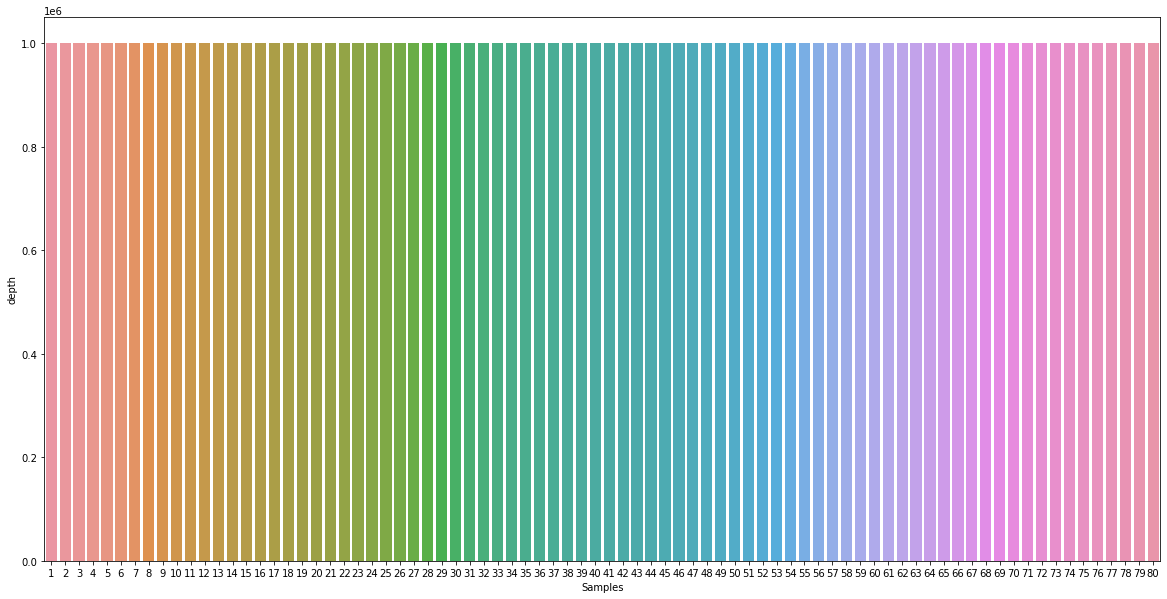

In [178]:
plt.figure(figsize=(20,10))
ax =sns.barplot( data=depth, y='depth', x="Samples")

Do not need to normalized

f)

In [179]:
dict_sample.values()

dict_values(['PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo'])

In [180]:
X = transcriptomics.iloc[:,1:].T.to_numpy(dtype=float)
pca = PCA(n_components=3)
pca_output = pca.fit_transform(X)
pca_output_df = pd.DataFrame(pca_output, columns=['PCA1', 'PCA2', 'PCA3'])
pca_output_df["groups"] =dict_sample.values()
pca_output_df

,PCA1,PCA2,PCA3,groups
0,59744.204875,5181.484207,34953.673194,PreAdipo
1,-36447.502550,11214.469551,6564.207381,PreAdipo
2,-15666.397486,-7873.272341,3183.165238,PreAdipo
3,-22423.413307,-20027.140990,-15412.563780,PreAdipo
4,-15830.729625,-13797.002922,-8727.933106,PreAdipo
...,...,...,...,...
75,39830.374618,16913.116447,2542.199214,Adipo
76,44353.454788,-2109.828106,-14291.751796,Adipo
77,-2515.045934,2289.387447,-29504.065115,Adipo
78,-23979.413582,32201.099006,-2077.782790,Adipo


In [181]:
fig = px.scatter_3d(pca_output_df, x='PCA1', y='PCA2', z='PCA3', color="groups")
fig.show()

g)

In [182]:
transcriptomics_transf =pd.DataFrame(np.log2(1+transcriptomics.iloc[:,1:]))

In [183]:
transcriptomics_transf.insert(0, 'Gene_ID', transcriptomics.iloc[:,0])

In [184]:
transcriptomics_transf

,Gene_ID,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,4.247928,3.700440,3.321928,4.392317,3.321928,3.807355,4.392317,3.169925,2.321928,...,3.321928,3.321928,4.954196,3.321928,4.584963,4.087463,2.000000,3.906891,3.584963,4.087463
1,ENSG00000000005,0.000000,0.000000,0.000000,1.584963,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,4.906891,1.584963,4.523562,2.000000,0.000000,1.584963,0.000000,2.584963
2,ENSG00000000419,3.459432,3.321928,3.321928,3.169925,3.459432,3.459432,2.807355,5.169925,3.807355,...,2.000000,3.321928,3.321928,4.000000,3.169925,3.321928,3.321928,2.321928,4.087463,2.584963
3,ENSG00000000457,0.000000,3.584963,0.000000,2.807355,1.584963,3.700440,3.584963,1.000000,1.584963,...,3.321928,3.169925,3.169925,2.584963,2.807355,0.000000,3.700440,3.807355,2.321928,3.584963
4,ENSG00000000460,0.000000,0.000000,3.906891,2.321928,2.584963,0.000000,0.000000,2.807355,2.321928,...,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,2.321928,0.000000,3.459432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63668,ENSG00000273485,0.000000,0.000000,0.000000,1.000000,0.000000,2.584963,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.700440,0.000000,0.000000,0.000000,0.000000
63669,ENSG00000273486,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.584963,0.000000,2.000000,0.000000,1.584963,2.584963,1.000000,0.000000,0.000000
63670,ENSG00000273487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
63672,ENSG00000273489,0.000000,0.000000,0.000000,1.584963,0.000000,1.000000,3.169925,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


h)

In [185]:
X = transcriptomics_transf.iloc[:,1:].T.to_numpy(dtype=float)
pca = PCA(n_components=3)
pca_output_log = pca.fit_transform(X)
pca_output_log_df = pd.DataFrame(pca_output_log, columns=['PCA1', 'PCA2', 'PCA3'])
pca_output_log_df["groups"] =dict_sample.values()
pca_output_log_df

,PCA1,PCA2,PCA3,groups
0,-42.826328,58.870317,7.276581,PreAdipo
1,-46.518798,-5.596103,-14.507043,PreAdipo
2,-63.707133,-33.929049,37.002902,PreAdipo
3,-57.726232,-67.490799,-11.241536,PreAdipo
4,-49.397369,-52.324115,9.429187,PreAdipo
...,...,...,...,...
75,53.782770,-3.432565,-58.762787,Adipo
76,69.008352,1.024671,43.881503,Adipo
77,61.583718,-54.186682,4.268586,Adipo
78,30.881711,-23.491736,-43.369881,Adipo


In [186]:
fig = px.scatter_3d(pca_output_log_df, x='PCA1', y='PCA2', z='PCA3', color="groups")
fig.show()

TRansformed data has better cluster

### 2. Differential gene expression

In [187]:
de_results = pd.DataFrame(columns = ["pval","fdr"," log2_mean_preadipo","log2_mean_adipo","log2_fold_change"])

a)

next step Welch test guys (enfin chais pas jai pas verif la variance)

In [188]:
pvalue=[]
for index, gene in transcriptomics_transf.iterrows():
    #Adipo_samples = {i for i in dict_sample if dict_sample[i]=="Adipo"}
    # PreAdipo_samples = {i for i in dict_sample if dict_sample[i]=="PreAdipo"}
    # ttest_ind(gene[Adipo_samples], gene[PreAdipo_samples])
    _, pval =(ttest_ind(gene[1:41], gene[41:81], equal_var=False))
    pvalue.append(pval)

In [189]:
preadip = transcriptomics_transf.columns[1:41]
adipo = transcriptomics_transf.columns[41:82]
_, pval = ttest_ind(transcriptomics_transf[preadip], transcriptomics_transf[adipo], equal_var=False)
pval

array([1.20172740e-51, 2.22374981e-21, 2.34568241e-40, 4.17649624e-63,
       3.29962033e-23, 7.31056384e-27, 5.48742018e-13, 2.49187990e-06,
       2.02747204e-05, 3.48250380e-89, 8.34031833e-33, 1.08166674e-01,
       8.47959771e-10, 5.11834593e-01, 1.33699501e-56, 1.75369912e-04,
       3.52635335e-68, 3.94000773e-31, 1.15310263e-19, 3.09067019e-05,
       4.73857362e-38, 5.23831411e-02, 1.90915781e-07, 1.81296768e-34,
       3.13287698e-06, 1.36641058e-09, 3.37009524e-37, 1.37023294e-21,
       5.39465893e-01, 6.46306912e-17, 9.54181384e-01, 1.71649017e-10,
       4.72975683e-26, 1.42189028e-01, 6.13234463e-01, 2.74174008e-35,
       3.23241103e-21, 5.79616776e-10, 9.61490552e-02, 6.29817940e-01])

In [192]:
de_results["pval"] = pvalue

In [193]:
de_results["pval"].shape[0] - de_results["pval"].dropna().shape[0]

0

In [194]:
de_results["pval"][de_results["pval"].isna()].index

Int64Index([], dtype='int64')

In [195]:
np.array(pvalue)

array([2.92128439e-02, 7.45687671e-09, 4.36098443e-01, ...,
       7.55923931e-01, 7.54913950e-03, 4.33539572e-01])

In [196]:
de_results.pval

0        2.921284e-02
1        7.456877e-09
2        4.360984e-01
3        3.718791e-01
4        4.032710e-01
             ...     
30233    7.679125e-01
30234    1.042618e-01
30235    7.559239e-01
30236    7.549140e-03
30237    4.335396e-01
Name: pval, Length: 30238, dtype: float64

In [197]:
(np.array(pvalue) == np.nan).any()

False

b)

In [203]:
t_f, fdr_corrected_p_values = fdrcorrection(de_results.pval)

In [204]:
t_f
fdr_corrected_p_values

array([1.24448855e-01, 1.87744411e-07, 6.05980641e-01, ...,
       8.54810315e-01, 4.24187990e-02, 6.03562135e-01])

In [200]:
mask = np.isfinite(pvalue)
pval_corrected = np.empty(np.array(pvalue).shape)
pval_corrected.fill(np.nan)
pval_corrected[mask] = multipletests(np.array(pvalue)[mask],method='fdr_bh')[1]
pval_corrected

array([1.24448855e-01, 1.87744411e-07, 6.05980641e-01, ...,
       8.54810315e-01, 4.24187990e-02, 6.03562135e-01])

In [201]:
sum(mask==True)

30238

In [205]:
de_results.fdr = fdr_corrected_p_values
de_results

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change
0,2.921284e-02,1.244489e-01,NaN,NaN,NaN
1,7.456877e-09,1.877444e-07,NaN,NaN,NaN
2,4.360984e-01,6.059806e-01,NaN,NaN,NaN
3,3.718791e-01,5.414783e-01,NaN,NaN,NaN
4,4.032710e-01,5.740024e-01,NaN,NaN,NaN
...,...,...,...,...,...
30233,7.679125e-01,8.632984e-01,NaN,NaN,NaN
30234,1.042618e-01,3.145747e-01,NaN,NaN,NaN
30235,7.559239e-01,8.548103e-01,NaN,NaN,NaN
30236,7.549140e-03,4.241880e-02,NaN,NaN,NaN


In [207]:
de_results.fdr.dropna()

0        1.244489e-01
1        1.877444e-07
2        6.059806e-01
3        5.414783e-01
4        5.740024e-01
             ...     
30233    8.632984e-01
30234    3.145747e-01
30235    8.548103e-01
30236    4.241880e-02
30237    6.035621e-01
Name: fdr, Length: 30238, dtype: float64

Why do we need to do that?

The false discovery rate (FDR) is a method of conceptualizing the rate of type I errors in null hypothesis testing when conducting multiple comparisons. FDR-controlling procedures are designed to control the FDR.


c)

In [208]:
de_results[de_results["fdr"] >= 0.05]

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change
0,0.029213,0.124449,NaN,NaN,NaN
2,0.436098,0.605981,NaN,NaN,NaN
3,0.371879,0.541478,NaN,NaN,NaN
4,0.403271,0.574002,NaN,NaN,NaN
9,0.032582,0.135853,NaN,NaN,NaN
...,...,...,...,...,...
30232,1.000000,1.000000,NaN,NaN,NaN
30233,0.767912,0.863298,NaN,NaN,NaN
30234,0.104262,0.314575,NaN,NaN,NaN
30235,0.755924,0.854810,NaN,NaN,NaN


24623 genes are differentially expressed (DE) based on this calculation

d)